# Linear Regression

Let's fabricate some data that shows a relationship between page speed and amount purchased:

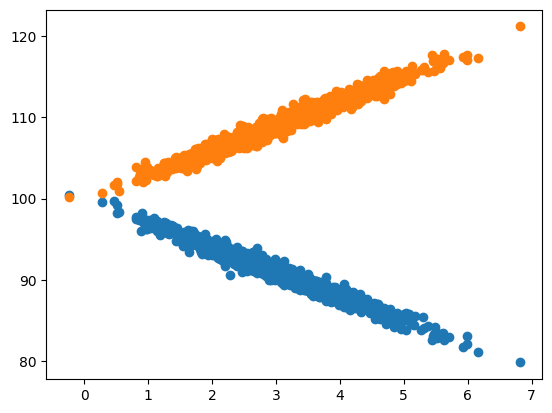

In [11]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000)

purchaseAmount1 = 100 - (pageSpeeds + np.random.normal(0, 0.2, 1000)) * 3
purchaseAmount2 = 100 + (pageSpeeds + np.random.normal(0, 0.2, 1000)) * 3

scatter(pageSpeeds, purchaseAmount1)
scatter(pageSpeeds, purchaseAmount2)

# On peut dire que le scatter nous a permis de tracer pageSpeeds en fonction de purshaseAmount, ie purchaseAmount = 100 + (pageSpeeds + bruit), le bruit est utiliser
# dans ce cas pour eviter que la courbe resultant ne soit pas confondu.

As we only have two features, we can keep it simple and just use scipy.state.linregress:

In [12]:
from scipy import stats

slope, intercept, r_value, _ , std_err = stats.linregress(pageSpeeds, purchaseAmount1)

## stats.linregress est une fonction qui fournit une méthode pour la regréssion linéaire :
## elle prends deux arguments(array1, array2) qui sont des variables dépendant et indépendant
## elle retourne un tuple qui contient les différents valeurs :
    ## slope : pente 
    ## intercept : ordonnée à l'origine
    ## r_value : le coefficient de corrélation (appelé aussi Pearson correlation coefficient) entre array1 et array2
    ##  stderr : l'erreur standard de l'estimation
    


The R-squared value shows the following fit:

In [13]:
r_value ** 2

## Lorsqu'on execute le bloc, on remarque que le valuer de R_Squared est proched de 1
## ====> On deduit qu'il s'agit d'un bon modele.

0.9646742621675922

Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

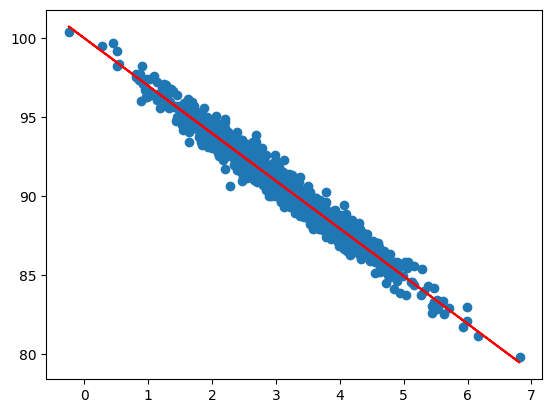

In [14]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

## fitline la fonction ax+b avec a=slope et b=intercept
## la fonction calcule donc la droite de regression lineaire
fitLine = predict(pageSpeeds)

## On affiche tout d'abord le nuage des donnees
plt.scatter(pageSpeeds, purchaseAmount1)

#On affiche la droite de regression resultante
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()


## On remarque que la droite traverse le nuage de point avec un minimum de difference.
## On peut deduire que la diffence est minime, d'ou c'est un bon modele.


## Activity

Try increasing the random variation in the test data, and see what effect it has on the r-squared error value.

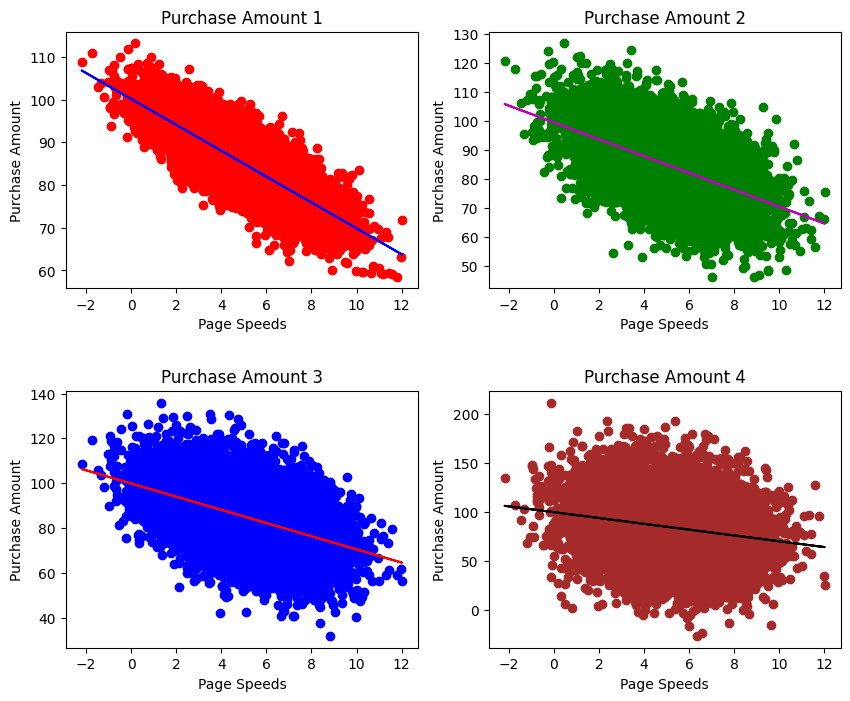

In [16]:
import numpy as np
import matplotlib.pyplot as plt

pageSpeeds = np.random.normal(5.0, 2.0, 10000)

# Couleurs pour chaque figure
colors = ["red", "green", "blue", "brown"]

#Pour cette activité 
purchaseAmount_1 = 100 - (pageSpeeds + np.random.normal(0, 1.5, 10000)) * 3
purchaseAmount_2 = 100 - (pageSpeeds + np.random.normal(0, 3.0, 10000)) * 3
purchaseAmount_3 = 100 - (pageSpeeds + np.random.normal(0, 4.0, 10000)) * 3
purchaseAmount_4 = 100 - (pageSpeeds + np.random.normal(0, 10.0, 10000)) * 3

slope_1 , intercept_1 , r_value_1 , _ , _ = stats.linregress(pageSpeeds, purchaseAmount_1)
slope_2 , intercept_2 , r_value_2 , _ , _ = stats.linregress(pageSpeeds, purchaseAmount_2)
slope_3 , intercept_3 , r_value_3 , _ , _ = stats.linregress(pageSpeeds, purchaseAmount_3)
slope_4 , intercept_4 , r_value_4 , _ , _ = stats.linregress(pageSpeeds, purchaseAmount_4)

fitLine_1 = slope_1 * pageSpeeds + intercept_1
fitLine_2 = slope_2 * pageSpeeds + intercept_2
fitLine_3 = slope_3 * pageSpeeds + intercept_3
fitLine_4 = slope_4 * pageSpeeds + intercept_4

# Créer 2 figures avec 2 graphiques chacune
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)

# Tracer les données sur chaque graphique et ajouter une légende
axs[0, 0].scatter(pageSpeeds, purchaseAmount_1, color=colors[0], label='Données')
axs[0, 0].plot(pageSpeeds, fitLine_1, c='b', label='Déviation N°1')
axs[0, 0].set_title("Purchase Amount 1")
axs[0, 0].set_xlabel("Page Speeds")
axs[0, 0].set_ylabel("Purchase Amount")

axs[0, 1].scatter(pageSpeeds, purchaseAmount_2, color=colors[1], label='Données')
axs[0, 1].plot(pageSpeeds, fitLine_2, c='m', label='Déviation N°2')
axs[0, 1].set_title("Purchase Amount 2")
axs[0, 1].set_xlabel("Page Speeds")
axs[0, 1].set_ylabel("Purchase Amount")

axs[1, 0].scatter(pageSpeeds, purchaseAmount_3, color=colors[2], label='Données')
axs[1, 0].plot(pageSpeeds, fitLine_3, c='r', label='Déviation N°3')
axs[1, 0].set_title("Purchase Amount 3")
axs[1, 0].set_xlabel("Page Speeds")
axs[1, 0].set_ylabel("Purchase Amount")

axs[1, 1].scatter(pageSpeeds, purchaseAmount_4, color=colors[3], label='Données')
axs[1, 1].plot(pageSpeeds, fitLine_4, c='k', label='Déviation N°4')
axs[1, 1].set_title("Purchase Amount 4")
axs[1, 1].set_xlabel("Page Speeds")
axs[1, 1].set_ylabel("Purchase Amount")

# Afficher les figures
plt.show()

In [17]:
print(r_value_1 ** 2)
print(r_value_2 ** 2)
print(r_value_3 ** 2)
print(r_value_4 ** 2)

0.6542389189706094
0.29065743907373687
0.2002827518371823
0.038791027691462046


In [ ]:
#On remarque que le plus on augement la variation des données => La valeur de R_squared diminue
#La conclusion est que la régression linéaire n'est plus valable